<div style="float:left">
            <h1 style="width:900px">Neighborhood Social Inequalities in Road Traffic Accidents:  Evidence from Airbnb Data </h1>
            <h2 style="width:900px">CASA0013: Introduction to Programming for Spatial Analysts</h2>
            <h3 style="width:450px">Student ID: 20191357</h3>
            <h3 style="width:450px">Word Count: 2482</h3>
</div>

# Reproducible Analysis

In [1]:
# import packages needed 
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp

In [2]:
# read the Airbnb data 
url = 'https://raw.githubusercontent.com/ChenYifan617/i2p-assessment2/main/listings.csv'
df = pd.read_csv(url, sep=',')
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
df[0:5]

Data frame is 76,984 x 16


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,97,7,192,2020-03-26,1.48,2,279
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,2,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.67,1,150
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.36,15,330
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


## Data Selecting and Cleaning

Show the types of data columns 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              76984 non-null  int64  
 1   name                            76961 non-null  object 
 2   host_id                         76984 non-null  int64  
 3   host_name                       76973 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   76984 non-null  object 
 6   latitude                        76984 non-null  float64
 7   longitude                       76984 non-null  float64
 8   room_type                       76984 non-null  object 
 9   price                           76984 non-null  int64  
 10  minimum_nights                  76984 non-null  int64  
 11  number_of_reviews               76984 non-null  int64  
 12  last_review                     

Delete column "neighbourhood_group"

In [4]:
df.drop(['neighbourhood_group'], axis=1, inplace=True)
df.shape

(76984, 15)

import the London analysis zone boundaries data

In [5]:
zone = gpd.read_file('https://github.com/ChenYifan617/i2p-assessment2/blob/main/block.gpkg?raw=true')
zone = zone.to_crs(epsg=4326)
zone.crs
zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        649 non-null    object  
 1   GSS_CODE    649 non-null    object  
 2   HECTARES    649 non-null    float64 
 3   NONLD_AREA  649 non-null    float64 
 4   LB_GSS_CD   649 non-null    object  
 5   BOROUGH     649 non-null    object  
 6   POLY_ID     649 non-null    int64   
 7   geometry    649 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 40.7+ KB


Add the geo attributes into Airbnb data(df)

In [6]:
airbnb = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='epsg:4326')
airbnb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
#read the traffic accident data 
url2 = 'https://raw.githubusercontent.com/ChenYifan617/i2p-assessment2/main/DfTRoadSafety_Accidents_2019/Road%20Safety%20Data%20-%20Accidents%202019.csv'
crash = pd.read_csv(url2, sep=',',low_memory=False)
print(f"Data frame is {crash.shape[0]:,} x {crash.shape[1]}")
crash.info()
crash.head(5)

Data frame is 117,536 x 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                            

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [8]:
geocrash = gpd.GeoDataFrame(crash, geometry=gpd.points_from_xy(crash.Longitude, crash.Latitude), crs='epsg:4326')
geocrash.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
def hotelposition():
  f,ax = plt.subplots(figsize=(10,7))

  zone.plot(ax=ax, facecolor='gray');

  airbnb.plot(ax=ax, color='blue', markersize=0.05);

  plt.legend(['Hotel Position']);

  plt.tight_layout();

Calculate the mean house price and count traffic accidents group by 'POLY_ID'

In [10]:
airbnb_zone = gpd.sjoin(airbnb,zone, how="inner", op="within")
crash_zone = gpd.sjoin(geocrash,zone, how="inner", op="within")

In [11]:
#count traffic accidnets in each zone
countcrash = crash_zone['POLY_ID'].value_counts()
count_crash= countcrash.to_frame()
count_crash= count_crash.rename(columns={'POLY_ID':'count'})
count_crash['POLY_ID'] = count_crash.index

In [12]:
#calculate mean price in each zone
meanprice = airbnb_zone.groupby('POLY_ID').mean()['price']
mean_price = meanprice.to_frame()

merge count_crash and mean_price into zone

In [13]:
#tem_zone = gpd.sjoin(zone, meanprice, how = 'left', op = 'within')
#gdf_hotel_like_ward = gpd.sjoin(gdf_hotel_like, ward, how = 'left', op = 'within')

merge_temp = zone.merge(mean_price,how = 'left',on='POLY_ID')
final_zone = merge_temp.merge(count_crash,how = 'left',on='POLY_ID')
final_zone.price.fillna(105, inplace=True)

## Map Generating

In [14]:
#London Airbnb Hotel Average Price Distribution
def pricemap():
  f,ax = plt.subplots(figsize=(10,7))
  final_zone.plot(ax=ax,column='price', cmap='OrRd',scheme='quantiles',legend=True)
  plt.tight_layout();
  ax.axis('off') 
  ax.set_title('London Airbnb Hotel Average Price Distribution',fontdict={'fontsize':'30', 'fontweight':'5'})
  a = ax.annotate('Source: InsideAirbnb (2020)',
                 xy=(0.95, 0.1), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='bottom', 
                 fontsize=20, fontweight=4)
  a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
  ax.get_legend().set_title("Average Price($)")


In [15]:
#London traffic accidents heat map 
def crashmap():
  f,ax = plt.subplots(figsize=(10,7))
  final_zone.plot(ax=ax,column='count', cmap='OrRd',scheme='quantiles',legend=True)
  plt.tight_layout();
  ax.axis('off') 
  ax.set_title('London traffic accidents hotmap ',fontdict={'fontsize':'30', 'fontweight':'5'})
  a = ax.annotate('Source: Road Traffic Accidents - data.gov.uk(2019)',
                 xy=(0.95, 0.1), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='bottom', 
                 fontsize=20, fontweight=4)
  a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
  ax.get_legend().set_title("Crash frequency")

# OLS Fitting

Descriptive statistics for price and count

In [16]:
des = final_zone.describe()

In [17]:
#linear regression using pandas dataframe
import statsmodels.formula.api as sm
reg = sm.ols(formula="count ~ price.apply(np.log)", data=final_zone).fit()
print( reg.params)

Intercept              5.609492
price.apply(np.log)    7.607482
dtype: float64


In [18]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.82
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           0.000623
Time:                        10:48:40   Log-Likelihood:                -3056.9
No. Observations:                 649   AIC:                             6118.
Df Residuals:                     647   BIC:                             6127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6095    

# Excutive Briefing

## Executive Summary

***Key Findings:*** 
1. The zones around the center of London have higher housing price and cheap hotel prone to locate in the London borderline where means economically underdeveloped areas. 
2. The zones in the center of London accompany with the highest road accidents density, and the farther the distance, the fewer accidents.
3. The gap between wealthy-zones and poor-zones is large in terms of traffic accidents occurrence. 

***Recommendation:*** 

While economic development, the government must ensure the safety of citizens’ travel. Moreover, for underdeveloped areas, more compulsory policies and regulations for boosting the hotel and tourism industry should be carried out for narrowing the gap between rich and poor. 

## Traffic Accidents Are Less Common in Rich Areas


With the birth of the sharing economy, Aribnb and Uber have driven the economy development to a certain extent. But at the same time, many problems also follow, such as road traffic accident issues. As estimated by the World Health Organization (WHO, 2017), at least 1.25 million people die in road traffic accidents worldwide, with an average of at least 3,425 deaths per day. Road traffic accidents have become the ninth leading cause of death in the world, and the traffic safety situation is very severe. Thus, many efforts have been taken to study road traffic accidents, especially on the cause of the traffic accidents. There are many significant factors influencing the occurrence traffic accidents and social inequalities in road traffic accidents. 

At the macro level, previous research found that a higher economic development worsens the road safety situation in the short and long term (Bougueroua, M, Carnis, et al., 2016). While some researchers concluded that economy has a non-linear effect on traffic accident mortality, increasing fatality rate early but later becomes protective (Eduard, F, van, et al., 2000). In contrast, many studies analyzed the social inequalities in road traffic accidents at the micro level. For instance, Dolman Law Group (2015) found that rural areas are more likely to have high traffic accident rates than urban zones. Road incident frequency are about five times higher in low-income areas, compared with wealthy neighborhoods (Sarah Fechth, 2012).

As noted above, it is difficult to answer the question: whether wealthy areas are safer than poor zones? On the one hand, compared with low-income zones, wealthy areas have enough money investing in improving infrastructure to make community safer. On the other hand, developed zones always accompany with high traffic volumes, which means more accident risk exposure. Therefore, the present study specifically focuses on analyzing the relationship between the zonal development level and traffic accident frequency. The zonal development level is measured by zonal mean housing price, based on Airbnb data for London, while the traffic accident data are obtained from UK government data center. 


## A brief Description of Airbnb Data

Airbnb was founded in August 2008 and is headquartered in San Francisco, California. Airbnb is a travel housing rental community, users can publish, search for holiday housing rental information and complete online booking procedures through the Internet or mobile apps. As released from Airbnb, Airbnb’s platform bridges nearly 4 million hosts worldwide together sharing more than 5 million active listings. The listings contain rich information, such as rent housing price, which can be used to measure the economic activity level. In this analysis, through merging the housing price in each listing into natural Wald and calculating the mean housing price for each zone, which is a proxy variable for identifying the low-income and rich zone. As the pciture below, it demonstrates the distribution of Airbnb housing in London, which is more concentrated in the center.In contrast, there are fewer houses located around London border.

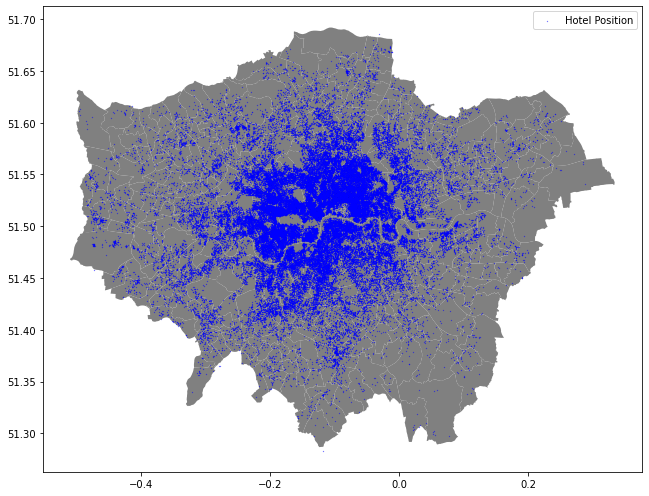

In [19]:
hotelposition()

In London, the average housing price vary from £26.3(min) to £8476.7(max) with mean £105, showing housing vary greatly in different regions. 

In [20]:
des[['price','count']]

,price,count
count,649.000000,649.000000
mean,104.992696,39.041602
std,346.341832,27.139269
min,26.333333,1.000000
25%,60.495238,22.000000
50%,77.880952,33.000000
75%,104.604167,49.000000
max,8476.666667,331.000000


## How does Airbnb affect the wealth gap in different regions

The tourism industry has grown tremendously in recent decades: between 1990 and 2017, the number of international tourists worldwide increased from approximately 400 million to 1.3 billion (WTO, 2018).London is the top destination for British tourists, and the number of tourists every year is also increasing exponentially. meanwhile, as the hospitality industry came into being, Airbnb quickly occupied the housing market through low prices. Peer-to-peer home-sharing platforms also partly meeting the growing demand for urban travel. Many travelers already treat Airbnb as an alternative to established hotels.It is inevitable that the tourism growth will bring economic growth, but at the same time, for economically less developed areas and geographically remote areas, lower housing prices and lower room prices will inevitably lead to a growing gap in economic development between different regions. Besides, airbnb effectively promotes local tourism and supports the area's restaurants, attractions and other surrounding businesses.The partnership aims to boost economic development in the region and kick-start the return of tourism to the region.To some extent, this has led to the formation of 'wealthy zone' and 'poor zone'.

## Where the wealthy zone locate in London? 

***Average Housing Price：***
Due to difference varying areas, the average housing price is a proxy indicator of economic activity. Through hotel average price distribution map (see figure below), the zones in center of London have higher housing price within £109.55 to £8476.67. This is because London has a high level of per capita income and a scarcity of housing. And this is also the reason for the serious separation of job and residence in London. According to the policy the London government launched short-term rental law in the legislation of Deregulation Act 2015 and implemented in 2017, by limiting the housing rental market in London for less than 90 days, maintain the sustainable development of Shared economy, prevent the family house short lease of rapid change,to alleviate the pressure of the housing in London (UK Goverment, 2015).In addition, cheap hotel prone to locate in the London borderline with the lowest price at £26.33 where means economically underdeveloped areas.

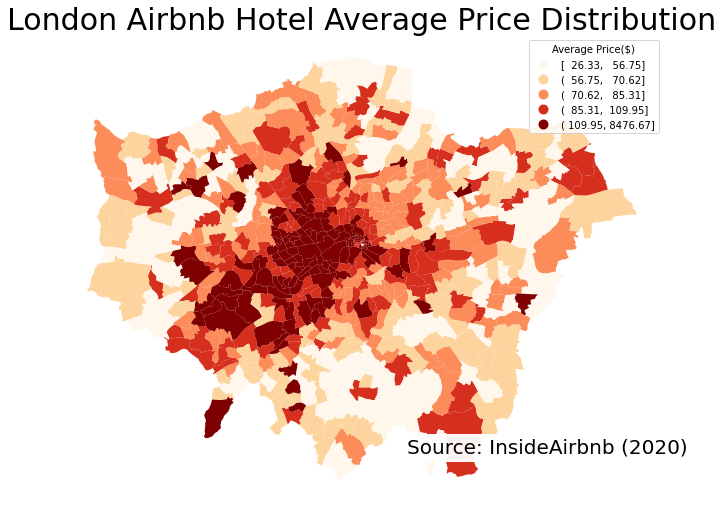

In [21]:
pricemap()

***traffic accident heat map:***
    
The London traffic accidents heat map was made according to the crash frequency varying zones. As can be seen from the heat map below, the city of London is an accident-prone area where accident density is much higher than other areas with the maximum value of 331. It can attribute to high traffic volumes in workdays and road network congestion. In contrast, there are few accidents outside the city of London with the minimum value of 1, especially near the London border.

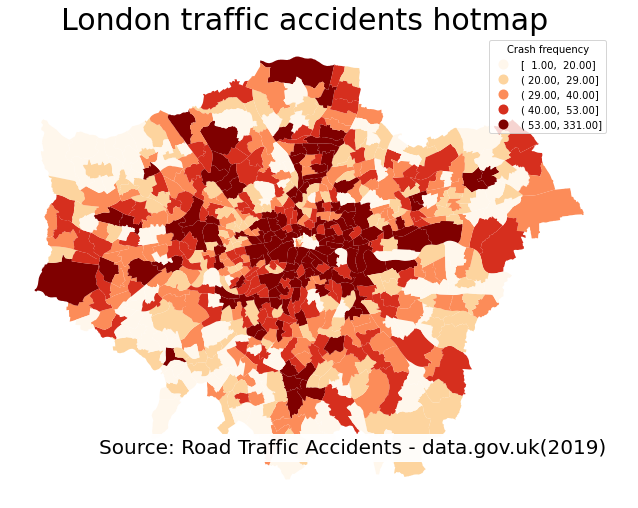

In [22]:
crashmap()

***Comparative analysis:***
    
Combining the hotel average price distribution map and traffic accidents heat map, we can find intuitively that areas with high housing prices have more accidents, and vice versa. Thus, from a qualitative point of view, we assume that there is an positive relationship between housing prices and accidents. However, the present model only includes ‘price’ as the predictor, the model regression results might estimate biased. But anyway, the result shows that there exists neighborhood social inequalities in road traffic accidents. 

## OLS Regression Results Analysis? 

Through the above analysis, we can conclude that there may be a statistical correlation between housing prices and accidents. So in this section, the ordinary least squares (OLS) was used to test the assumed relationship. Firstly, we developed the OLS model directly for ‘traffic accident count’ and ‘housing price’, but the model is not statistically significant. Therefore, we first logarithm the housing price, and then build the OLS model. Fortunately, the OLS model is statistically significant at 0.001. The OLS model can be written as:

$ \ accidents= 7.67\times ln(price) + 5.40\\ $

The p value of log(price) is 0.01, smaller than 0.05, which means log(price) has a significant impact on accidents. The coefficient of log(price) is positive, every one unit increase of price(log) is associated with 7.67 unit incresae of accidents.


The results show that there is a non-linear positive correlation between accidents and housing prices. That indicate that areas with higher housing prices have more accidents.

## Conclusion
To explore the neighborhood social inequalities in road traffic accidents, various techniques including descriptive statistics, thematic map production, and regression analysis were utilized. The visual analysis results show that the Airbnb hotel renting price in zones in city of London is the highest and cheap hotel prone to locate in the London borderline where means economically underdeveloped areas. Moreover, the zones with high traffic accidents frequency always accompany with higher housing price. In addition, the empirical analysis results indicate clearly that the gap between wealthy-zones and poor-zones is large in terms of traffic accidents occurrence. 
## Suggestion
From the Mayor of the Greater London Authority's point of view, the government should shoulder their responsibility to narrow large gap between wealthy-zones and poor-zones in traffic accidents. Firstly, for low-income areas, more efforts can be taken into promote the development of tourism and hotel industry and improve infrastructure for mitigating the numbers of traffic accidents. On the other hand, the government should focus on developed regions, where always have higher crash rates. For example, traffic police daily patrol should around accident-prone locations. 


## Reference
Bougueroua, M, Carnis, et al (2016). Economic development, mobility and traffic accidents in Algeria. Accident Analysis & Prevention, 92, pp. 168-174. https://doi.org/10.1016/j.aap.2016.03.016

Dolman Law Group (2015). Are Auto Accidents More Common In Rural or Urban Areas? .Available at: https://www.dolmanlaw.com/auto-accidents-common-rural-urban-areas/

Sarah Fechth (2012). Accident-Zone: Poorer Neighborhoods Have Less-Safe Road Designs. .Available at: https://www.scientificamerican.com/article/accident-zone-poorer-neighborhoods/


Van B E F , Borsboom Gerard J J , Mackenbach J P (2000). Economic development and traffic accident mortality in the industrialized world, 1962-1990. International Journal of Epidemiology, 2000(3), pp. 503-509.

WHO. World health statistics (2017): monitoring health for the SDGs, sustainable development goals. World Health Organization.

WTO,(2018)UNWTO Tourism Highlights.2018 Edition.Technical Report, United Nations World Tourism Organization.
